<a href="https://colab.research.google.com/github/garrettfenchel/CodingDojoProject_1/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 2 - Data Cleaning and Explorization**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sales_original = pd.read_csv("/content/drive/MyDrive/Work/Unilever/Data Science/Project 1/sales_predictions.csv")

In [3]:
sales_original

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**DATA EXPLORATION**

In [4]:
#Finding Nulls
sales_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#Viewing Averages
sales_original.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
#Viewing How many Outlets
sales_original.value_counts(["Outlet_Identifier"])


Outlet_Identifier
OUT027               935
OUT013               932
OUT035               930
OUT046               930
OUT049               930
OUT045               929
OUT018               928
OUT017               926
OUT010               555
OUT019               528
dtype: int64

In [7]:
#Checking if all values for Outlet Size are null for each Outlet ID, they are so we can't fill Outlet Size based on Outlet ID
sales_filled = sales_original
sales_filled["Outlet_Size"] = sales_filled["Outlet_Size"].fillna("NO DATA")
sales_filled.groupby(["Outlet_Identifier","Outlet_Size"])["Item_Identifier"].count()


Outlet_Identifier  Outlet_Size
OUT010             NO DATA        555
OUT013             High           932
OUT017             NO DATA        926
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT045             NO DATA        929
OUT046             Small          930
OUT049             Medium         930
Name: Item_Identifier, dtype: int64

In [9]:
#Seeing if there is a relationship between Tier and Outlet Size, nothing definitive 
sales_filled.groupby(["Outlet_Location_Type","Outlet_Size"])["Item_Identifier"].count()

Outlet_Location_Type  Outlet_Size
Tier 1                Medium          930
                      Small          1458
Tier 2                NO DATA        1855
                      Small           930
Tier 3                High            932
                      Medium         1863
                      NO DATA         555
Name: Item_Identifier, dtype: int64

In [11]:
#Seeing if there is a relationship between Outlet Type and Outlet Size, maybe all Grocery Stores are small, but not sure on Supermarket Type 1. Not definitive enough to assume
sales_filled.groupby(["Outlet_Location_Type","Outlet_Type","Outlet_Size"])["Item_Identifier"].count()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           528
                      Supermarket Type1  Medium          930
                                         Small           930
Tier 2                Supermarket Type1  NO DATA        1855
                                         Small           930
Tier 3                Grocery Store      NO DATA         555
                      Supermarket Type1  High            932
                      Supermarket Type2  Medium          928
                      Supermarket Type3  Medium          935
Name: Item_Identifier, dtype: int64

In [12]:
#Seeing if total sales can be used to assume size, nothing definitive 
sales_filled.groupby(["Outlet_Location_Type","Outlet_Type","Outlet_Size","Outlet_Identifier"])["Item_Outlet_Sales"].sum()

Outlet_Location_Type  Outlet_Type        Outlet_Size  Outlet_Identifier
Tier 1                Grocery Store      Small        OUT019               1.796941e+05
                      Supermarket Type1  Medium       OUT049               2.183970e+06
                                         Small        OUT046               2.118395e+06
Tier 2                Supermarket Type1  NO DATA      OUT017               2.167465e+06
                                                      OUT045               2.036725e+06
                                         Small        OUT035               2.268123e+06
Tier 3                Grocery Store      NO DATA      OUT010               1.883402e+05
                      Supermarket Type1  High         OUT013               2.142664e+06
                      Supermarket Type2  Medium       OUT018               1.851823e+06
                      Supermarket Type3  Medium       OUT027               3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [13]:
#Checking if can fill Item Weight based on Item ID, we can
sales_filled["Item_Weight"] = sales_filled["Item_Weight"].fillna("NO DATA")
sales_filled.groupby(["Item_Identifier","Item_Weight"])["Item_Identifier"].count()


Item_Identifier  Item_Weight
DRA12            11.6           6
DRA24            19.35          5
                 NO DATA        2
DRA59            8.27           6
                 NO DATA        2
                               ..
NCZ42            10.5           5
NCZ53            9.6            4
                 NO DATA        1
NCZ54            14.65          5
                 NO DATA        2
Name: Item_Identifier, Length: 2697, dtype: int64

In [14]:
#Item visibility at 0, shouldn't be 0
sales_filled[sales_filled["Item_Visibility"] == 0]
sales_filled.groupby(["Outlet_Identifier"])["Item_Visibility"].min()
sales_filled.groupby(["Item_Identifier"])["Item_Visibility"].min()



Item_Identifier
DRA12    0.000000
DRA24    0.039735
DRA59    0.000000
DRB01    0.081841
DRB13    0.007038
           ...   
NCZ30    0.000000
NCZ41    0.000000
NCZ42    0.000000
NCZ53    0.024359
NCZ54    0.000000
Name: Item_Visibility, Length: 1559, dtype: float64

In [16]:
sales_filled.groupby(["Item_Type","Outlet_Location_Type"])["Item_MRP"].mean()

Item_Type              Outlet_Location_Type
Baking Goods           Tier 1                  124.389121
                       Tier 2                  126.258343
                       Tier 3                  127.945391
Breads                 Tier 1                  146.045788
                       Tier 2                  137.639740
                       Tier 3                  140.323138
Breakfast              Tier 1                  125.774400
                       Tier 2                  151.478131
                       Tier 3                  146.640916
Canned                 Tier 1                  138.696381
                       Tier 2                  143.355646
                       Tier 3                  137.330057
Dairy                  Tier 1                  145.929290
                       Tier 2                  148.667932
                       Tier 3                  150.365087
Frozen Foods           Tier 1                  136.504640
                       Tier 

**CLEAN CODE**

In [98]:
sales_original = pd.read_csv("/content/drive/MyDrive/Work/Unilever/Data Science/Project 1/sales_predictions.csv")
sales_clean = sales_original

In [99]:
#Replacing NULLS for Item Weight based on Item ID 
#Not replacing Oulet Size, there is no accurate way of predicting size...also don't think it will help towards price prediction knowing squarefootage of store size

sales_clean = sales_clean.sort_values(by=["Item_Identifier","Item_Weight"])
sales_clean["Item_Weight"] = sales_clean["Item_Weight"].fillna(method="ffill")
sales_clean.info()
sales_clean.groupby(["Item_Identifier","Item_Weight"])["Item_Identifier"].count()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 118 to 7166
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


Item_Identifier  Item_Weight
DRA12            11.600         6
DRA24            19.350         7
DRA59            8.270          8
DRB01            7.390          3
DRB13            6.115          5
                               ..
NCZ30            6.590          7
NCZ41            19.850         5
NCZ42            10.500         5
NCZ53            9.600          5
NCZ54            14.650         7
Name: Item_Identifier, Length: 1559, dtype: int64

In [100]:
#Replacing Fat Content Values
sales_clean['Item_Fat_Content'] = sales_clean['Item_Fat_Content'].replace(['LF'],'Low Fat')
sales_clean['Item_Fat_Content'] = sales_clean['Item_Fat_Content'].replace(['low fat'],'Low Fat')
sales_clean['Item_Fat_Content'] = sales_clean['Item_Fat_Content'].replace(['reg'],'Regular')

**GROUPING AND AVERAGING**

In [20]:
#Average Price of Types of Items 

sales_group = sales_clean.groupby(["Item_Type"])["Item_MRP"].mean()
sales_group.sort_values()

#sales_clean.sort_values(by=["Item_Identifier","Item_Weight"])

Item_Type
Baking Goods             126.380766
Health and Hygiene       130.818921
Soft Drinks              131.492506
Others                   132.851430
Hard Drinks              137.077928
Frozen Foods             138.503366
Canned                   139.763832
Meat                     139.882032
Breads                   140.952669
Breakfast                141.788151
Seafood                  141.841719
Fruits and Vegetables    144.581235
Snack Foods              146.194934
Starchy Foods            147.838023
Dairy                    148.499208
Household                149.424753
Name: Item_MRP, dtype: float64

In [21]:
sales_clean.groupby(["Item_Type","Outlet_Size"])["Item_MRP"].mean()

Item_Type              Outlet_Size
Baking Goods           High           129.202044
                       Medium         126.178568
                       Small          125.213364
Breads                 High           133.758960
                       Medium         140.861039
                       Small          145.523651
Breakfast              High           147.490585
                       Medium         134.537511
                       Small          130.568027
Canned                 High           135.442708
                       Medium         138.124851
                       Small          142.295429
Dairy                  High           153.509173
                       Medium         148.512174
                       Small          145.942101
Frozen Foods           High           136.829250
                       Medium         140.557015
                       Small          137.838544
Fruits and Vegetables  High           145.572870
                       Medium     

In [22]:
sales_clean.groupby(["Item_Type","Outlet_Type"])["Item_MRP"].mean()

Item_Type      Outlet_Type      
Baking Goods   Grocery Store        126.438068
               Supermarket Type1    125.975262
               Supermarket Type2    126.385315
               Supermarket Type3    128.809243
Breads         Grocery Store        146.452873
                                       ...    
Soft Drinks    Supermarket Type3    123.313587
Starchy Foods  Grocery Store        148.153754
               Supermarket Type1    147.793785
               Supermarket Type2    151.786918
               Supermarket Type3    143.078386
Name: Item_MRP, Length: 64, dtype: float64

In [23]:
sales_clean.groupby(["Item_Fat_Content"])["Item_MRP"].mean()


Item_Fat_Content
Low Fat    140.714098
Regular    141.504259
Name: Item_MRP, dtype: float64

In [24]:
sales_clean.groupby(["Item_Type","Outlet_Location_Type"])["Item_MRP"].mean()

Item_Type              Outlet_Location_Type
Baking Goods           Tier 1                  124.389121
                       Tier 2                  126.258343
                       Tier 3                  127.945391
Breads                 Tier 1                  146.045788
                       Tier 2                  137.639740
                       Tier 3                  140.323138
Breakfast              Tier 1                  125.774400
                       Tier 2                  151.478131
                       Tier 3                  146.640916
Canned                 Tier 1                  138.696381
                       Tier 2                  143.355646
                       Tier 3                  137.330057
Dairy                  Tier 1                  145.929290
                       Tier 2                  148.667932
                       Tier 3                  150.365087
Frozen Foods           Tier 1                  136.504640
                       Tier 

**Part 3 - Visualization**

In [101]:
sales_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924


Text(0.5, 0.98, 'Total Sales by Item Cagegory')

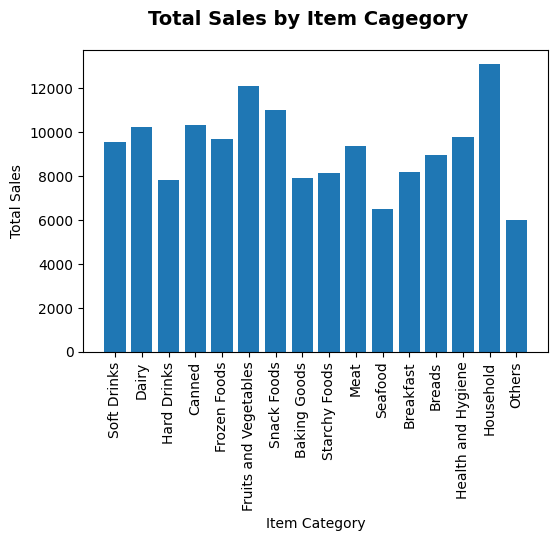

In [54]:
#Total Sales by Item Category

fig=plt.figure(dpi=100) 
#sns.barplot(x = sales_clean.Item_Type, y = sales_clean.Item_Outlet_Sales);
plt.bar(sales_clean.Item_Type, sales_clean.Item_Outlet_Sales)
plt.xticks(rotation = 90)
plt.ylabel("Total Sales")
plt.xlabel("Item Category")
fig.suptitle("Total Sales by Item Cagegory", fontsize=14, fontweight="bold")



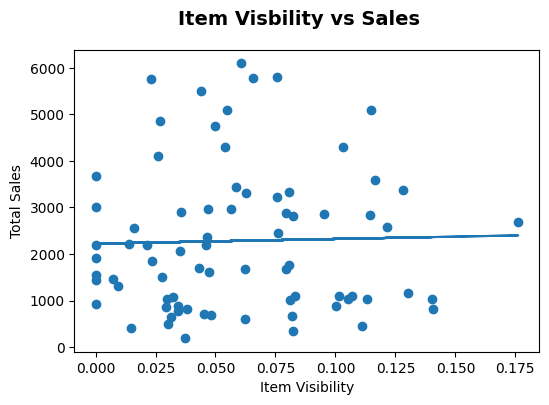

In [57]:
#Relationship between Item Vistibility and Sales
fig=plt.figure(dpi=100) 
x = sales_1["Item_Visibility"]
y = sales_1["Item_Outlet_Sales"]

sales_1 = sales_clean[sales_clean["Item_Type"] == "Baking Goods"]
sales_1 = sales_1[sales_1["Outlet_Identifier"] == "OUT046"]
plt.scatter(x,y)
plt.ylabel("Total Sales")
plt.xlabel("Item Visibility")
fig.suptitle("Item Visbility vs Sales", fontsize=14, fontweight="bold")
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, OUT010 to OUT049
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Item_Sales  10 non-null     float64
dtypes: float64(1)
memory usage: 160.0+ bytes


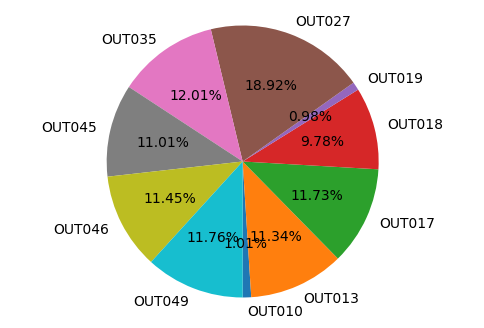

In [72]:
#Percent of Sales by Outlet
sales_group = sales_clean.groupby(["Outlet_Identifier"])[["Item_Sales"]].sum()
sales_group.info()
fig=plt.figure(dpi=100) 

x = sales_group.index
y = sales_group["Item_Sales"]
explotar = [0, 0, 0.1, 0]

ax1 = fig.add_subplot(1,1,1) 
ax1.pie(y, labels=x, autopct="%.2f%%", shadow = False, startangle=-90)
ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)

plt.show()


In [ ]:
ax1.bar(x, ya, sep, color='lightblue')
#ax1.plot(x, ya, 'gD--', color='green')
ax1.bar(x+sep, yb, sep, color='darkblue')

ax1.set_xticks(x+sep) #posición de etiquetas en x

ax1.set_xticklabels(["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10"]) #nombre de etiquetas en x

plt.show()

In [110]:
sales_drop = sales_clean.drop(sales_clean[sales_clean.Item_Type ==  "Hard Drinks"].index)
sales_drop = sales_drop.drop(sales_drop[sales_drop.Item_Type ==  "Household"].index)
sales_drop = sales_drop.drop(sales_drop[sales_drop.Item_Type ==  "Health and Hygiene"].index)
sales_drop = sales_drop.drop(sales_drop[sales_drop.Item_Type ==  "Others"].index)

sales_drop.groupby(["Item_Type","Item_Fat_Content"])[["Item_MRP"]].mean()

Item_MRP
Item_Type             Item_Fat_Content            
Baking Goods          Low Fat           120.525869
                      Regular           132.419203
Breads                Low Fat           134.582184
                      Regular           148.987514
Breakfast             Low Fat           165.259673
                      Regular           127.841304
Canned                Low Fat           139.552518
                      Regular           139.997787
Dairy                 Low Fat           147.115989
                      Regular           150.689305
Frozen Foods          Low Fat           139.019490
                      Regular           137.931307
Fruits and Vegetables Low Fat           136.558069
                      Regular           152.977571
Meat                  Low Fat           130.998788
                      Regular           145.804195
Seafood               Low Fat           113.508557
                      Regular           180.668644
Snack Foods           Low Fat           156.498173
                      Regular           132.159813
Soft Drinks           Low Fat           133.338029
                      Regular           121.771014
Starchy Foods         Low Fat           157.970341
                      Regular           135.249385

In [112]:
sales_reg = sales_drop[sales_drop["Item_Fat_Content"] == "Regular"]
sales_reg = sales_reg.groupby(["Item_Type"])[["Item_MRP"]].mean()

sales_low = sales_drop[sales_drop["Item_Fat_Content"] == "Low Fat"]
sales_low = sales_low.groupby(["Item_Type"])[["Item_MRP"]].mean()

labels = ["Baking Goods","Bread","Breakfast","Canned","Dairy","Frozen Foods","Fruits and Vegetables","Meat","Seafood","Snacks","Soft Drinks","Starchy Foods"]


Text(0.5, 0.98, 'Average Price by Category and Fat Content')

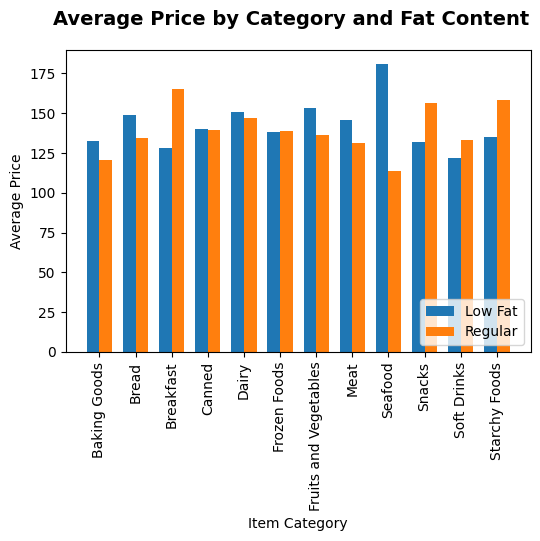

In [118]:
fig=plt.figure(dpi=100) 
x = np.arange(len(labels))
width = 0.35
plt.bar(x - width/2, sales_reg["Item_MRP"], width, label="Low Fat")
plt.bar(x + width/2, sales_low["Item_MRP"], width, label="Regular")
plt.xticks(x, labels)
plt.xticks(rotation = 90)

plt.ylabel("Average Price")
plt.xlabel("Item Category")
plt.legend(loc="lower right")
fig.suptitle("Average Price by Category and Fat Content", fontsize=14, fontweight="bold")